In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv('/content/air_quality_health_dataset(CLEANED) python.csv')
df.describe()


,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage,Health Burden
count,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,100.640057,59.426287,80.062647,39.78953,20.173113,1.005583,29.970140,24.950267,55.064617,7.445380,...,50.097303,75.081943,0.143667,100.544343,5453.904000,49.108047,9.923333,4981.290573,37.367603,34.910667
std,19.736108,15.132330,20.522298,9.83439,5.011217,0.301989,8.026801,4.927079,20.336369,4.296747,...,28.678914,14.375200,0.350810,29.058151,2564.332936,29.179811,3.161031,2821.503470,18.837549,5.913291
min,35.170000,12.350000,3.270000,0.78000,3.350000,0.000000,0.000000,6.720000,20.004725,0.000000,...,0.020000,50.010000,0.000000,50.040000,1005.000000,0.010000,1.000000,100.290000,5.010000,18.000000
25%,87.447500,49.315000,66.025000,33.28000,16.760000,0.800000,24.587500,21.487500,36.896629,3.707500,...,25.547500,62.460000,0.000000,74.895000,3256.500000,23.140000,8.000000,2549.130000,20.917500,31.000000
50%,100.485000,59.670000,79.685000,39.77500,20.185000,1.010000,29.940000,24.945000,55.411279,7.480000,...,49.585000,75.530000,0.000000,100.895000,5437.000000,49.105000,10.000000,4960.965000,37.615000,35.000000
75%,113.470000,69.580000,94.062500,46.33500,23.522500,1.210000,35.550000,28.310000,72.455010,11.080000,...,75.367500,87.375000,0.000000,126.252500,7629.000000,74.860000,12.000000,7408.607500,53.440000,39.000000
max,178.520000,108.650000,150.580000,73.78000,37.140000,2.340000,61.540000,43.060000,89.978805,15.000000,...,99.980000,99.990000,1.000000,149.990000,9998.000000,99.980000,23.000000,9998.640000,69.940000,56.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3000 non-null   object 
 1   region                  3000 non-null   object 
 2   AQI                     3000 non-null   float64
 3   AQI Category            3000 non-null   object 
 4   PM2.5                   3000 non-null   float64
 5   PM10                    3000 non-null   float64
 6   NO2                     3000 non-null   float64
 7   SO2                     3000 non-null   float64
 8   CO                      3000 non-null   float64
 9   O3                      3000 non-null   float64
 10  temperature             3000 non-null   float64
 11  humidity                3000 non-null   float64
 12  wind_speed              3000 non-null   float64
 13  precipitation           3000 non-null   float64
 14  hospital_visits         3000 non-null   

In [ ]:
print(f"convert date to datetime")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df[['date']].head())
df.info()

convert date to datetime
        date
0 2020-01-01
1 2020-01-02
2 2020-01-03
3 2020-01-04
4 2020-01-05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    3000 non-null   datetime64[ns]
 1   region                  3000 non-null   object        
 2   AQI                     3000 non-null   float64       
 3   AQI Category            3000 non-null   object        
 4   PM2.5                   3000 non-null   float64       
 5   PM10                    3000 non-null   float64       
 6   NO2                     3000 non-null   float64       
 7   SO2                     3000 non-null   float64       
 8   CO                      3000 non-null   float64       
 9   O3                      3000 non-null   float64       
 10  temperature             3000 non-null   float64       
 11  humid

Boxplot for the 'AQI'


/tmp/ipython-input-15-1774393373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['AQI'], palette='viridis')


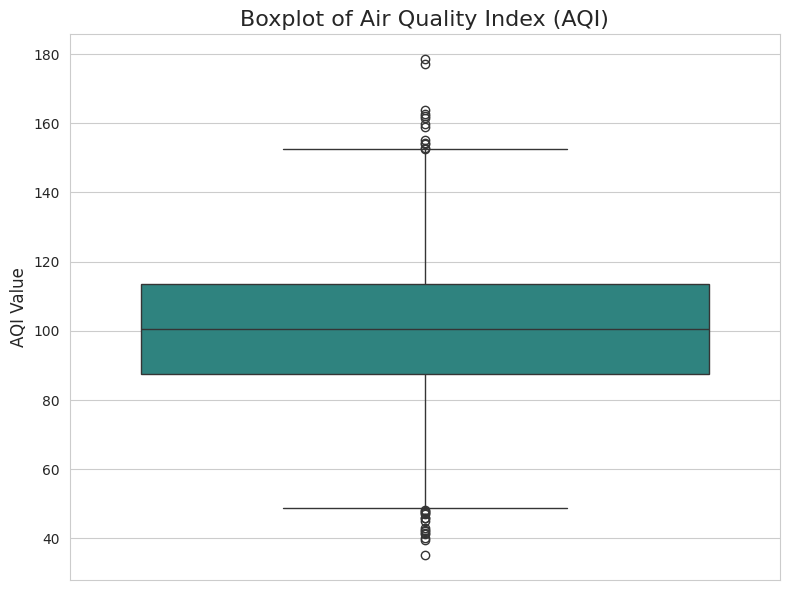

In [ ]:
print(f"Boxplot for the 'AQI'")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['AQI'], palette='viridis')
plt.title('Boxplot of Air Quality Index (AQI)', fontsize=16)
plt.ylabel('AQI Value', fontsize=12)
plt.tight_layout()
plt.show()

Distribution of Air Quality Index (AQI) by Region


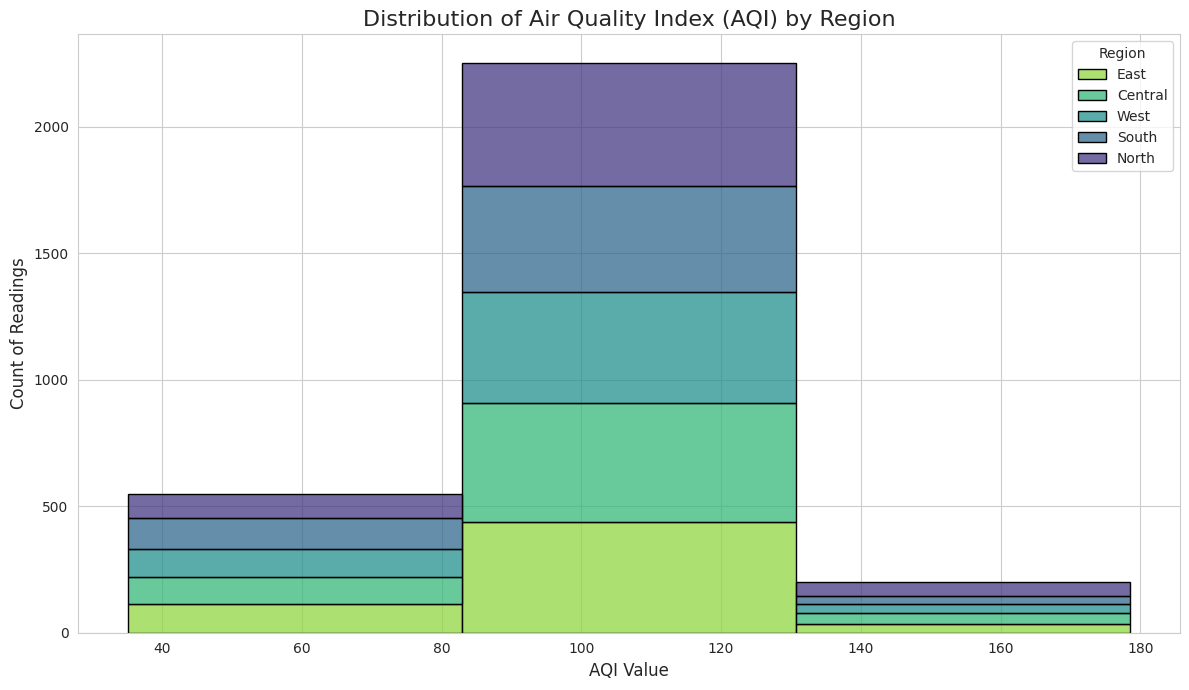

In [ ]:
print(f"Distribution of Air Quality Index (AQI) by Region")
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='AQI', hue='region',multiple='stack' ,  binwidth=50,  edgecolor='black', palette='viridis')
plt.title('Distribution of Air Quality Index (AQI) by Region', fontsize=16)
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('Count of Readings', fontsize=12)
plt.legend(title='Region', loc='upper right', labels=df['region'].unique())
plt.tight_layout()
plt.show()



A line graph showing the trend of 'AQI' over Months.


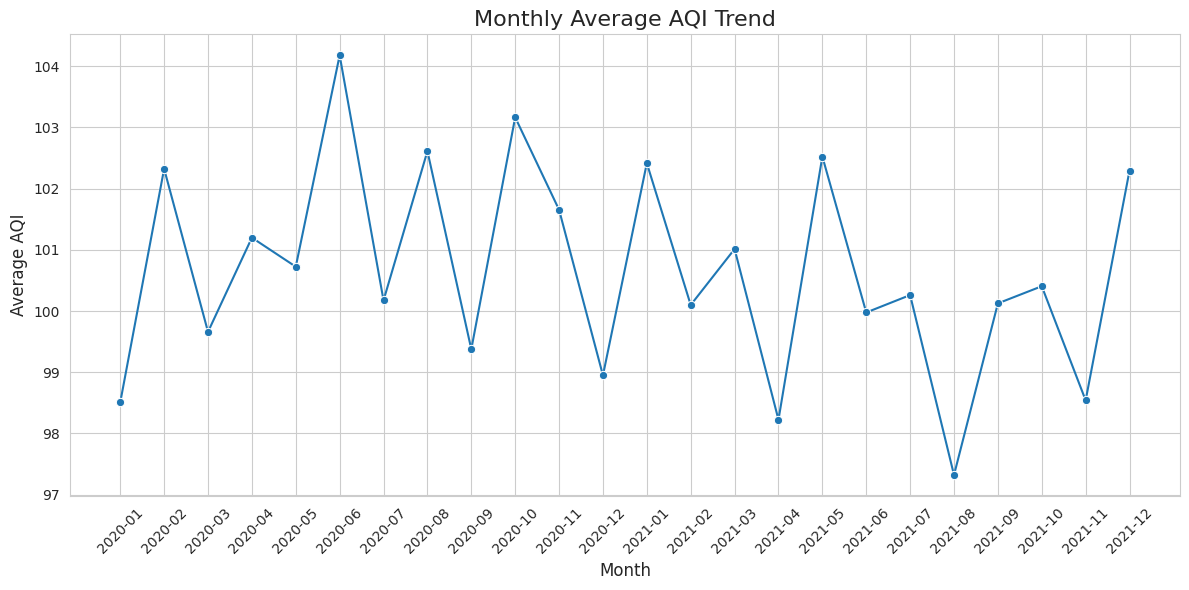

In [ ]:
print(f"A line graph showing the trend of 'AQI' over Months.")

df['year_month'] = df['date'].dt.to_period('M')
monthly_aqi = df.groupby('year_month')['AQI'].mean().reset_index()
monthly_aqi['year_month'] = monthly_aqi['year_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_aqi, x='year_month', y='AQI', marker='o')
plt.title('Monthly Average AQI Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Chi-square test of independence for  region and AQI Category
Null Hypothesis (H_0): There is no association between the region and the AQI Category.
Alternative Hypothesis (H_a): There is an association between the region and the AQI Category.
Contingency Table:
AQI Category  Good  Moderate  Unhealthy  Unhealthy For Sensitive
region                                                          
Central          4       291          4                      278
East             5       281          6                      343
North            7       295          2                      282
South            3       315          3                      298
West             1       265          6                      311

Chi-Square Statistic: 17.466913171781115
P-value: 0.13286150479151992
Degrees of Freedom: 12
Expected Frequencies Table:
AQI Category      Good    Moderate  Unhealthy  Unhealthy For Sensitive
region                                                                
Central       

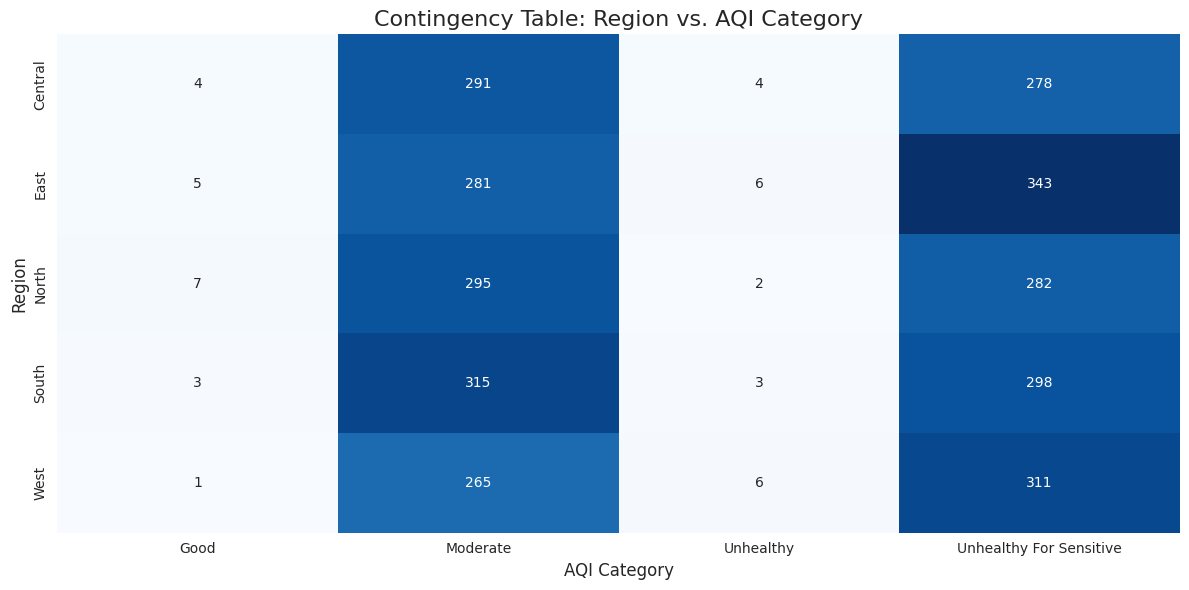

In [ ]:
print(f'The Chi-square test of independence for  region and AQI Category' )

print(f"Null Hypothesis (H_0): There is no association between the region and the AQI Category.")
print(f"Alternative Hypothesis (H_a): There is an association between the region and the AQI Category.")
contingency_table = pd.crosstab(df['region'], df['AQI Category'])
print("Contingency Table:")
print(contingency_table)
chi2, p_value, dof, expected = scipy.stats.chi2_contingency(contingency_table)
print(f"\nChi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")
if p_value < alpha:
  print("Result: Reject the null hypothesis. There is a significant association between AQI Category  and Region.")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant association AQI Category and Region.")
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Contingency Table: Region vs. AQI Category', fontsize=16)
plt.xlabel('AQI Category', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

Pearson Coefficient Test on AQI , Health Burden , Green Cover Percentage
Pearson Correlation Coefficient between AQI & Health Burden: 0.007472514807518423
P-value: 0.6824503999687277
Pearson Correlation Coefficient between AQI & Green Cover Percentage: 0.015859604931057997
P-value: 0.3851978690745267
Result: Fail to reject the null hypothesis. There is no significant correlation between AQI, Health Burden, and Green Cover Percentage.


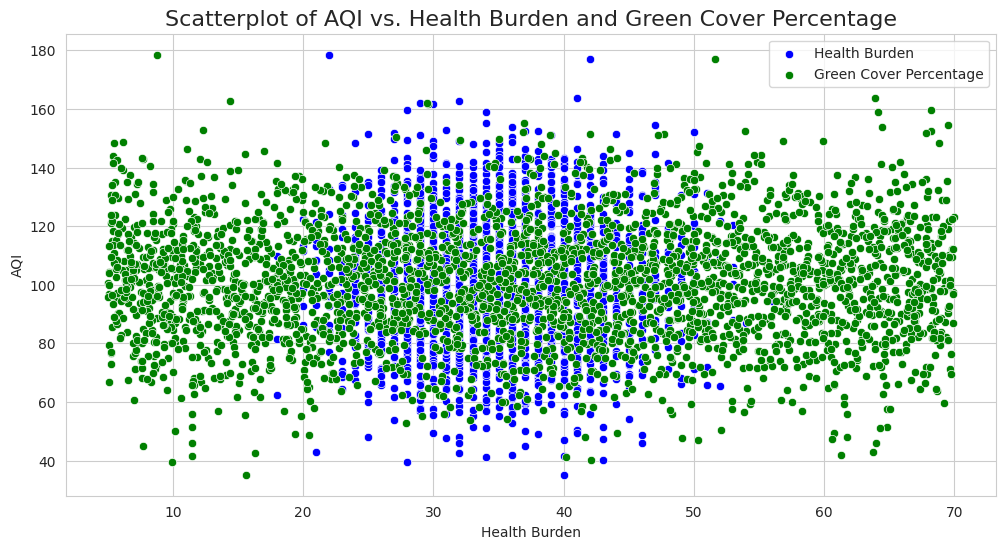

In [ ]:
print(f"Pearson Coefficient Test on AQI , Health Burden , Green Cover Percentage")

correlation_coefficient_hbu, p_value_hbu = pearsonr(df['AQI'], df['Health Burden'])
correlation_coefficient_gc, p_value_gc = pearsonr(df['AQI'], df['green_cover_percentage'])
print(f"Pearson Correlation Coefficient between AQI & Health Burden: {correlation_coefficient_hbu}")
print(f"P-value: {p_value_hbu}")

print(f"Pearson Correlation Coefficient between AQI & Green Cover Percentage: {correlation_coefficient_gc}")
print(f"P-value: {p_value_gc}")

alpha = 0.05
if p_value_hbu < alpha and p_value_gc < alpha:
  print("Result: Reject the null hypothesis. There is a significant correlation between AQI, Health Burden, and Green Cover Percentage.")
  print("Result: Reject the null hypothesis. There is a significant correlation between AQI, Health Burden, and Green Cover Percentage.")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant correlation between AQI, Health Burden, and Green Cover Percentage.")

  sns.set_style("whitegrid")
  plt.figure(figsize=(12, 6))
  sns.scatterplot(data=df, x='Health Burden', y='AQI', color='blue', label='Health Burden')
  sns.scatterplot(data=df, x='green_cover_percentage', y='AQI', color='green', label='Green Cover Percentage')
  plt.title('Scatterplot of AQI vs. Health Burden and Green Cover Percentage', fontsize=16)


One Way ANOVA for Region & HealthCare Burden
Null Hypothesis (H_0): The average 'Health Burden' is the same for all regions.
Alternative Hypothesis (H_1): At least one region's average 'Health Burden' is significantly different from the others.
                 sum_sq      df         F   PR(>F)
region        38.367707     4.0  0.274048  0.89485
Residual  104827.690959  2995.0       NaN      NaN
Result: Fail to reject the null hypothesis. There is no significant difference in Health Burden between regions.

There is no statistically significant difference in the average 'Health Burden' among the different regions.The F-statistic is very small (close to 0). This indicates that the variation in 'Health Burden' between the regions is very small compared to the variation within the regions. A small F-statistic, coupled with a high p-value, reinforces the conclusion that the group means are not significantly different.


/tmp/ipython-input-54-2935319914.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if table_hbu['PR(>F)'][0] < alpha:


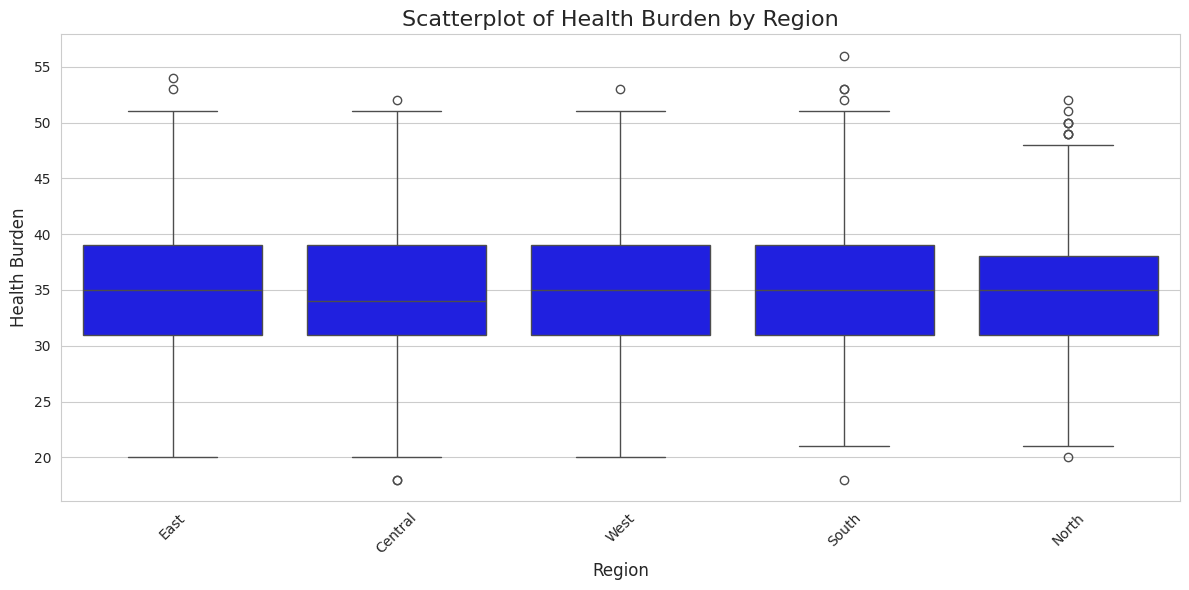

In [ ]:
print(f"One Way ANOVA for Region & HealthCare Burden")

print(f"Null Hypothesis (H_0): The average 'Health Burden' is the same for all regions.")
print(f"Alternative Hypothesis (H_1): At least one region's average 'Health Burden' is significantly different from the others.")

df.rename(columns={'Health Burden': 'Health_Burden'}, inplace=True)
model_hbu = ols('Health_Burden ~ region', data=df).fit()
table_hbu = sm.stats.anova_lm(model_hbu, typ=2)
print(table_hbu)

alpha = 0.05
if table_hbu['PR(>F)'][0] < alpha:
  print("Result: Reject the null hypothesis. There is a significant difference in Health Burden between regions.")
else:
  print("Result: Fail to reject the null hypothesis. There is no significant difference in Health Burden between regions.")

  print(f"\nThere is no statistically significant difference in the average 'Health Burden' among the different regions.The F-statistic is very small (close to 0). This indicates that the variation in 'Health Burden' between the regions is very small compared to the variation within the regions. A small F-statistic, coupled with a high p-value, reinforces the conclusion that the group means are not significantly different.")

sns.set_style("whitegrid")
plt.figure(figsize=(12 , 6))
sns.boxplot(data=df, x='region', y='Health_Burden', color='blue')
plt.title('Scatterplot of Health Burden by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Health Burden', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()